### Task Select best features from from Wine Quality dataset.

In [64]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

* Data Link : https://www.kaggle.com/datasets/rajyellow46/wine-quality 

* Drive link : https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv

Note : Follow approach from Feature Selection Session - 2

In [3]:
df = pd.read_csv(r"D:\Jupyter\winequalityN.csv")
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [15]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform
encoded = encoder.fit_transform(df[["type"]])

# Convert to dataframe
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['type']))

# Combine original with encoded
final_df = pd.concat([df, encoded_df], axis=1).drop(columns="type")

In [17]:
final_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0.0,1.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0.0,1.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0.0,1.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0.0,1.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0.0,1.0


In [20]:
final_df.shape

(6497, 14)

In [24]:
final_df.isna().sum()

fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
type_red                 0
type_white               0
dtype: int64

In [26]:
X = final_df.drop(columns="quality")
y = final_df["quality"]

In [42]:
from sklearn.impute import KNNImputer

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

imputer = KNNImputer(n_neighbors=2)
X_imputed = imputer.fit_transform(X_scaled)

df_scaled = pd.DataFrame(X_imputed,columns=X.columns)

In [43]:
df_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
0,-0.167030,-0.423303,0.284180,3.206483,-0.315173,0.815565,0.959976,2.102214,-1.358722,-0.545791,-1.418558,-0.571367,0.571367
1,-0.706883,-0.241083,0.146489,-0.808012,-0.200996,-0.931107,0.287618,-0.232332,0.507693,-0.276979,-0.831615,-0.571367,0.571367
2,0.681310,-0.362563,0.559560,0.305958,-0.172452,-0.029599,-0.331660,0.134525,0.258838,-0.612994,-0.328521,-0.571367,0.571367
3,-0.012786,-0.666262,0.008799,0.642251,0.055902,0.928254,1.243074,0.301278,-0.176659,-0.881807,-0.496219,-0.571367,0.571367
4,-0.012786,-0.666262,0.008799,0.642251,0.055902,0.928254,1.243074,0.301278,-0.176659,-0.881807,-0.496219,-0.571367,0.571367


In [51]:
X_train,X_test,y_train,y_test = train_test_split(df_scaled,y,test_size=0.2,random_state=2)

In [52]:
model = LogisticRegression(max_iter=1000)

model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [53]:
y_pred = model.predict(X_test)

In [54]:
accuracy_score(y_test,y_pred)

0.5523076923076923

In [58]:
import warnings
warnings.filterwarnings("ignore")

model = LogisticRegression(max_iter=100)

print("training",np.mean(cross_val_score(model,X_train,y_train,cv=5,scoring="accuracy")))
print("testing",np.mean(cross_val_score(model,X_test,y_test,cv=5,scoring='accuracy')))

training 0.5410870289479528
testing 0.5523076923076923


### Applying Sequential Backword Elimination

In [59]:
lr = LogisticRegression()

sfs = SFS(lr,k_features="best",forward=False, floating=False, scoring='accuracy',cv=5)

sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LogisticRegression(), forward=False,
                          k_features=(1, 13), scoring='accuracy')

In [60]:
sfs.k_feature_idx_

(0, 1, 5, 6, 7, 8, 9, 10)

In [62]:
metric_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.5423076923076923, 0.510576923076923, 0.5543...",0.541087,"(fixed acidity, volatile acidity, citric acid,...",0.021051,0.016378,0.008189
12,"(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12)","[0.5442307692307692, 0.5163461538461539, 0.556...",0.54301,"(fixed acidity, volatile acidity, citric acid,...",0.018548,0.014431,0.007216
11,"(0, 1, 3, 5, 6, 7, 8, 9, 10, 11, 12)","[0.5451923076923076, 0.5182692307692308, 0.559...",0.544165,"(fixed acidity, volatile acidity, residual sug...",0.018887,0.014695,0.007348
10,"(0, 1, 3, 5, 6, 7, 8, 9, 10, 11)","[0.5451923076923076, 0.5182692307692308, 0.559...",0.544357,"(fixed acidity, volatile acidity, residual sug...",0.018839,0.014657,0.007329
9,"(0, 1, 3, 5, 6, 7, 8, 9, 10)","[0.5480769230769231, 0.5125, 0.558229066410009...",0.544165,"(fixed acidity, volatile acidity, residual sug...",0.022088,0.017185,0.008593
8,"(0, 1, 5, 6, 7, 8, 9, 10)","[0.5413461538461538, 0.5163461538461539, 0.549...",0.544743,"(fixed acidity, volatile acidity, free sulfur ...",0.02009,0.015631,0.007815
7,"(0, 1, 5, 6, 7, 9, 10)","[0.5375, 0.5144230769230769, 0.547641963426371...",0.541087,"(fixed acidity, volatile acidity, free sulfur ...",0.018934,0.014732,0.007366
6,"(1, 5, 6, 7, 9, 10)","[0.5355769230769231, 0.5153846153846153, 0.552...",0.541087,"(volatile acidity, free sulfur dioxide, total ...",0.018436,0.014344,0.007172
5,"(1, 5, 6, 7, 10)","[0.5326923076923077, 0.5144230769230769, 0.547...",0.539548,"(volatile acidity, free sulfur dioxide, total ...",0.018505,0.014398,0.007199
4,"(1, 6, 7, 10)","[0.5365384615384615, 0.5057692307692307, 0.538...",0.535699,"(volatile acidity, total sulfur dioxide, densi...",0.020484,0.015937,0.007969


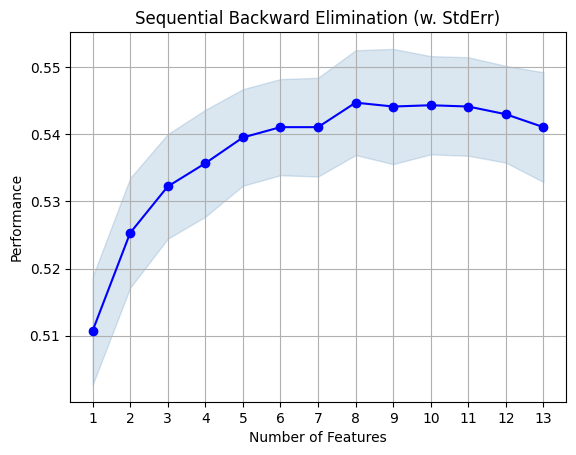

In [65]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_err',)

plt.title('Sequential Backward Elimination (w. StdErr)')
plt.grid()
plt.show()

### Applying Exhastive feature selection on features selected with Backword elimination

In [76]:
X_train_sel_b = X_train.iloc[:,[0, 1, 5, 6, 7, 8, 9, 10]]

In [80]:
lr = LogisticRegression()

sel = EFS(lr,max_features=8,scoring='accuracy',cv=5,n_jobs=-1)

In [81]:
model = sel.fit(X_train_sel_b,y_train)

Features: 255/255

In [82]:
sel.best_score_

0.5447434663507811

In [83]:
sel.best_idx_

(0, 1, 2, 3, 4, 5, 6, 7)

In [92]:
sel.best_feature_names_

('fixed acidity',
 'volatile acidity',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol')

In [85]:
pd.DataFrame.from_dict(sel.subsets_).T

,feature_idx,cv_scores,avg_score,feature_names
0,"(0,)","[0.42980769230769234, 0.43173076923076925, 0.4...",0.43198,"(fixed acidity,)"
1,"(1,)","[0.4461538461538462, 0.46923076923076923, 0.45...",0.464116,"(volatile acidity,)"
2,"(2,)","[0.43653846153846154, 0.43653846153846154, 0.4...",0.436598,"(free sulfur dioxide,)"
3,"(3,)","[0.43653846153846154, 0.43846153846153846, 0.4...",0.437368,"(total sulfur dioxide,)"
4,"(4,)","[0.4653846153846154, 0.4375, 0.461020211742059...",0.453724,"(density,)"
...,...,...,...,...
250,"(0, 1, 2, 4, 5, 6, 7)","[0.5288461538461539, 0.5173076923076924, 0.547...",0.536084,"(fixed acidity, volatile acidity, free sulfur ..."
251,"(0, 1, 3, 4, 5, 6, 7)","[0.5355769230769231, 0.5115384615384615, 0.544...",0.540126,"(fixed acidity, volatile acidity, total sulfur..."
252,"(0, 2, 3, 4, 5, 6, 7)","[0.5221153846153846, 0.4846153846153846, 0.514...",0.509912,"(fixed acidity, free sulfur dioxide, total sul..."
253,"(1, 2, 3, 4, 5, 6, 7)","[0.5336538461538461, 0.5144230769230769, 0.553...",0.54051,"(volatile acidity, free sulfur dioxide, total ..."


### Using Sequential forward selection

In [66]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [67]:
model = LogisticRegression()

sfs = SFS(model,k_features="best",floating=False,forward=True,scoring="accuracy",cv=5)

sfs.fit(X_train,y_train)

SequentialFeatureSelector(estimator=LogisticRegression(), k_features=(1, 13),
                          scoring='accuracy')

In [69]:
sfs.k_feature_idx_

(0, 1, 3, 5, 6, 7, 8, 9, 10, 11, 12)

In [71]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(10,)","[0.525, 0.48173076923076924, 0.526467757459095...",0.510682,"(alcohol,)",0.020684,0.016093,0.008046
2,"(1, 10)","[0.5259615384615385, 0.49423076923076925, 0.53...",0.525309,"(volatile acidity, alcohol)",0.021029,0.016361,0.008181
3,"(1, 7, 10)","[0.525, 0.5086538461538461, 0.5409047160731473...",0.532236,"(volatile acidity, density, alcohol)",0.020064,0.01561,0.007805
4,"(1, 6, 7, 10)","[0.5365384615384615, 0.5057692307692307, 0.538...",0.535699,"(volatile acidity, total sulfur dioxide, densi...",0.020484,0.015937,0.007969
5,"(1, 5, 6, 7, 10)","[0.5326923076923077, 0.5144230769230769, 0.547...",0.539548,"(volatile acidity, free sulfur dioxide, total ...",0.018505,0.014398,0.007199
6,"(1, 5, 6, 7, 9, 10)","[0.5355769230769231, 0.5153846153846153, 0.552...",0.541087,"(volatile acidity, free sulfur dioxide, total ...",0.018436,0.014344,0.007172
7,"(1, 3, 5, 6, 7, 9, 10)","[0.5403846153846154, 0.5086538461538461, 0.557...",0.543205,"(volatile acidity, residual sugar, free sulfur...",0.024421,0.019,0.0095
8,"(1, 3, 5, 6, 7, 9, 10, 11)","[0.5413461538461538, 0.5115384615384615, 0.552...",0.543589,"(volatile acidity, residual sugar, free sulfur...",0.023408,0.018212,0.009106
9,"(1, 3, 5, 6, 7, 9, 10, 11, 12)","[0.5413461538461538, 0.5115384615384615, 0.552...",0.543397,"(volatile acidity, residual sugar, free sulfur...",0.023384,0.018194,0.009097
10,"(1, 3, 5, 6, 7, 8, 9, 10, 11, 12)","[0.5384615384615384, 0.5163461538461539, 0.552...",0.542434,"(volatile acidity, residual sugar, free sulfur...",0.021203,0.016497,0.008248


### Applying Exhaustive Feature Selection on selected features with forward selection

In [75]:
X_train_sel_f = X_train.iloc[:,[0, 1, 3, 5, 6, 7, 8, 9, 10, 11, 12]]

In [88]:
model = LogisticRegression()

efs = EFS(model,max_features=11,scoring='accuracy',cv=5,n_jobs=-1)

In [89]:
efs.fit(X_train_sel_f,y_train)

Features: 2047/2047

ExhaustiveFeatureSelector(estimator=LogisticRegression(),
                          feature_groups=[[0], [1], [2], [3], [4], [5], [6],
                                          [7], [8], [9], [10]],
                          max_features=11, n_jobs=-1)

In [90]:
efs.best_feature_names_

('fixed acidity',
 'volatile acidity',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol')

In [91]:
efs.best_idx_

(0, 1, 3, 4, 5, 6, 7, 8)

In [93]:
efs.best_score_

0.5447434663507811

In [94]:
X_train_sel = sel.transform(X_train)
X_test_sel = sel.transform(X_test)

In [98]:
import warnings
warnings.filterwarnings("ignore")

model = LogisticRegression(max_iter=1000)

print("training",np.mean(cross_val_score(model,X_train_sel,y_train,cv=5,scoring="accuracy")))
print("testing",np.mean(cross_val_score(model,X_test_sel,y_test,cv=5,scoring='accuracy')))

training 0.49490412378766563
testing 0.4953846153846154
